In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('dataset.csv')

In [48]:
data.head(5)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14


In [49]:
data.shape

(250, 10)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          250 non-null    object 
 1   Category            250 non-null    object 
 2   Supplier            250 non-null    object 
 3   Warehouse_Location  250 non-null    object 
 4   Order_Date          250 non-null    object 
 5   Delivery_Date       250 non-null    object 
 6   Inventory_Level     250 non-null    int64  
 7   Stockouts           250 non-null    int64  
 8   Unit_Cost           250 non-null    float64
 9   Lead_Time           250 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 19.7+ KB


In [51]:
data.describe()

,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
count,250.000000,250.000000,250.000000,250.0000
mean,256.348000,0.188000,247.996080,10.0000
std,138.852392,0.391496,138.993919,5.0785
min,1.000000,0.000000,5.570000,1.0000
25%,149.000000,0.000000,126.965000,6.0000
50%,268.000000,0.000000,247.265000,10.0000
75%,373.750000,0.000000,377.477500,14.0000
max,499.000000,1.000000,493.750000,19.0000


In [52]:
data.isnull().sum()

Product_ID            0
Category              0
Supplier              0
Warehouse_Location    0
Order_Date            0
Delivery_Date         0
Inventory_Level       0
Stockouts             0
Unit_Cost             0
Lead_Time             0
dtype: int64

In [53]:
data.duplicated().sum()

np.int64(0)

In [54]:
data.value_counts()

Product_ID  Category     Supplier    Warehouse_Location  Order_Date  Delivery_Date  Inventory_Level  Stockouts  Unit_Cost  Lead_Time
P0001       Toys         Supplier B  Chicago             2025-02-23  2025-03-01     15               0          446.20     6            1
P0002       Furniture    Supplier C  San Francisco       2025-02-25  2025-03-15     138              0          208.02     18           1
P0003       Furniture    Supplier B  Chicago             2025-01-22  2025-02-08     270              0          423.75     14           1
P0004       Toys         Supplier D  Chicago             2025-01-29  2025-02-06     151              0          123.17     8            1
P0005       Food         Supplier A  Dallas              2025-03-10  2025-03-24     237              1          462.93     14           1
                                                                                                                                       ..
P0246       Toys         Supplier C  Ch

In [55]:
data.nunique()

Product_ID            250
Category                5
Supplier                4
Warehouse_Location      4
Order_Date             79
Delivery_Date          80
Inventory_Level       200
Stockouts               2
Unit_Cost             250
Lead_Time              19
dtype: int64

In [56]:
data_supply_lead = data.groupby('Supplier')['Lead_Time'].mean().round(2)
data_supply_lead

Supplier
Supplier A    10.67
Supplier B     9.02
Supplier C     9.60
Supplier D    10.82
Name: Lead_Time, dtype: float64

In [57]:
data_supply_lead.mean()

np.float64(10.0275)

In [58]:
data['Lead_Time']

0       6
1      18
2      14
3       8
4      14
       ..
245    15
246     8
247     9
248    11
249     6
Name: Lead_Time, Length: 250, dtype: int64

In [59]:
data_late_deliveries = data[data['Lead_Time']>10.02]
data_late_deliveries

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14
5,P0006,Clothing,Supplier D,New York,2025-02-20,2025-03-13,223,0,407.72,17
6,P0007,Furniture,Supplier D,New York,2025-02-17,2025-03-06,248,0,128.05,17
...,...,...,...,...,...,...,...,...,...,...
242,P0243,Food,Supplier A,San Francisco,2025-04-06,2025-04-18,343,0,165.84,11
243,P0244,Electronics,Supplier D,Chicago,2025-04-08,2025-04-25,247,0,318.67,17
244,P0245,Clothing,Supplier A,Chicago,2025-02-18,2025-03-05,113,0,315.73,15
245,P0246,Toys,Supplier C,Chicago,2025-02-03,2025-02-18,499,0,15.93,15


In [60]:
data_late_category = data_late_deliveries.groupby('Category')['Lead_Time'].sum()
data_late_category


Category
Clothing       380
Electronics    323
Food           384
Furniture      329
Toys           300
Name: Lead_Time, dtype: int64

In [61]:
total_late_cat = data_late_category.sum()
total_late_cat

np.int64(1716)

In [62]:
data_late_category_perc = data_late_deliveries.groupby('Category')['Lead_Time'].sum() * 100/total_late_cat

data_late_category_perc

Category
Clothing       22.144522
Electronics    18.822844
Food           22.377622
Furniture      19.172494
Toys           17.482517
Name: Lead_Time, dtype: float64

In [63]:
stockout_frequency_warehouse = data.groupby('Warehouse_Location')['Stockouts'].sum()
stockout_frequency_warehouse

Warehouse_Location
Chicago           7
Dallas           15
New York         11
San Francisco    14
Name: Stockouts, dtype: int64

In [64]:
data['Warehouse_Location'].unique()

array(['Chicago', 'San Francisco', 'Dallas', 'New York'], dtype=object)

In [65]:
data['Average_Daily_Usage'] = (data['Inventory_Level'] / data['Lead_Time']).round(2)
data['Average_Daily_Usage']

0       2.50
1       7.67
2      19.29
3      18.88
4      16.93
       ...  
245    33.27
246     5.25
247    35.89
248    17.09
249    29.00
Name: Average_Daily_Usage, Length: 250, dtype: float64

In [66]:
data['Lead_Safety_Stock'] = data['Lead_Time'].apply(lambda x: x-10 if x >10 else  0)
data['Lead_Safety_Stock']

0      0
1      8
2      4
3      0
4      4
      ..
245    5
246    0
247    0
248    1
249    0
Name: Lead_Safety_Stock, Length: 250, dtype: int64

In [67]:
data.head(5)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time,Average_Daily_Usage,Lead_Safety_Stock
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6,2.50,0
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18,7.67,8
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14,19.29,4
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8,18.88,0
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14,16.93,4


In [68]:
data['Safety_Stock'] = data['Average_Daily_Usage']* data['Lead_Safety_Stock']
data['Safety_Stock']

0        0.00
1       61.36
2       77.16
3        0.00
4       67.72
        ...  
245    166.35
246      0.00
247      0.00
248     17.09
249      0.00
Name: Safety_Stock, Length: 250, dtype: float64

In [69]:
data['Rop'] = (data['Average_Daily_Usage'] * data['Lead_Time']) + data['Lead_Safety_Stock']
data['Rop']

0       15.00
1      146.06
2      274.06
3      151.04
4      241.02
        ...  
245    504.05
246     42.00
247    323.01
248    188.99
249    174.00
Name: Rop, Length: 250, dtype: float64

In [70]:
data_supplier_late = data_late_deliveries.groupby('Supplier')['Lead_Time'].sum()
data_supplier_late

Supplier
Supplier A    477
Supplier B    380
Supplier C    384
Supplier D    475
Name: Lead_Time, dtype: int64

In [71]:
data['Cost_Savings'] = data['Average_Daily_Usage'] * (data['Lead_Time'] - (data['Lead_Time'] * 10/100))
data['Cost_Savings']

0       13.500
1      124.254
2      243.054
3      135.936
4      213.318
        ...   
245    449.145
246     37.800
247    290.709
248    169.191
249    156.600
Name: Cost_Savings, Length: 250, dtype: float64

In [72]:
data['Cost_Savings_Total'] = data['Cost_Savings'].sum()
data['Cost_Savings_Total'].unique().round(2)

array([57678.89])

In [73]:
data.head(5)

,Product_ID,Category,Supplier,Warehouse_Location,Order_Date,Delivery_Date,Inventory_Level,Stockouts,Unit_Cost,Lead_Time,Average_Daily_Usage,Lead_Safety_Stock,Safety_Stock,Rop,Cost_Savings,Cost_Savings_Total
0,P0001,Toys,Supplier B,Chicago,2025-02-23,2025-03-01,15,0,446.20,6,2.50,0,0.00,15.00,13.500,57678.894
1,P0002,Furniture,Supplier C,San Francisco,2025-02-25,2025-03-15,138,0,208.02,18,7.67,8,61.36,146.06,124.254,57678.894
2,P0003,Furniture,Supplier B,Chicago,2025-01-22,2025-02-08,270,0,423.75,14,19.29,4,77.16,274.06,243.054,57678.894
3,P0004,Toys,Supplier D,Chicago,2025-01-29,2025-02-06,151,0,123.17,8,18.88,0,0.00,151.04,135.936,57678.894
4,P0005,Food,Supplier A,Dallas,2025-03-10,2025-03-24,237,1,462.93,14,16.93,4,67.72,241.02,213.318,57678.894


In [74]:
data_efficiency_supplier = data.groupby('Supplier')['Lead_Safety_Stock'].sum()
data_efficiency_supplier

Supplier
Supplier A    147
Supplier B    110
Supplier C    124
Supplier D    155
Name: Lead_Safety_Stock, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

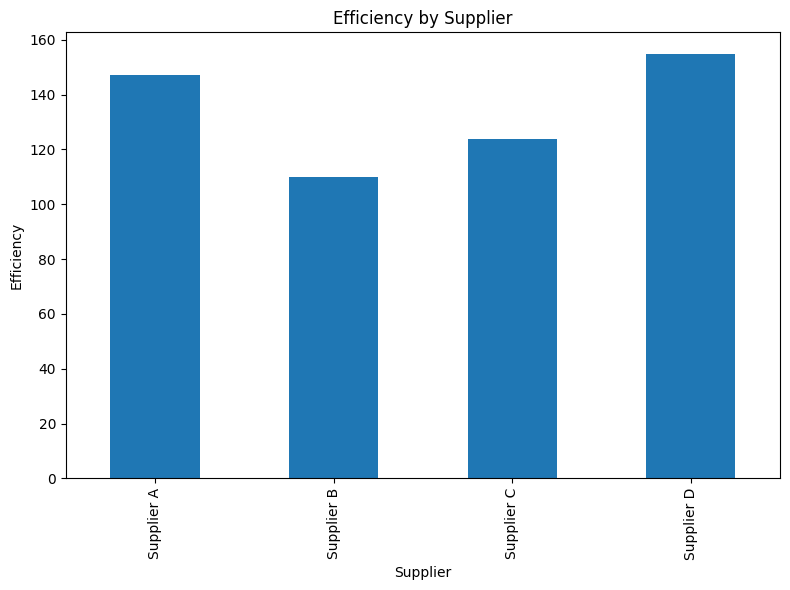

In [77]:
plt.figure(figsize=(8,6))
data_efficiency_supplier.plot(kind = 'bar' )
plt.title('Efficiency by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Efficiency')
plt.tight_layout()
plt.show